## Задание 3c Касьянов Глеб

![](images/1_3c.png "Задача")
![](images/1_3c_1.png "Задача_1")

дифференцирование назад 2 порядка
$$f_{n} * \Delta t = \cfrac{3}{2} * y_{n} - 2 * y_{n - 1} + \cfrac{1}{2} * y_{n - 2}$$

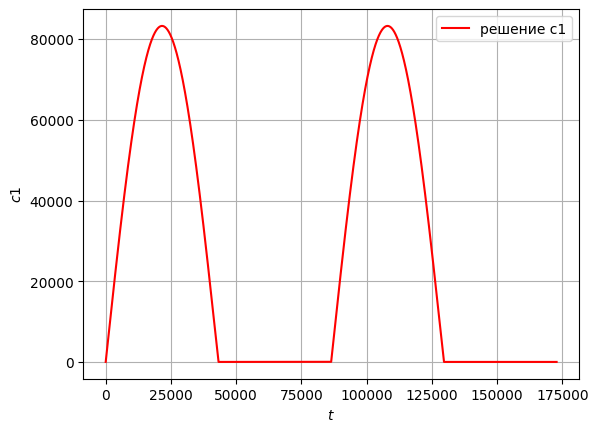

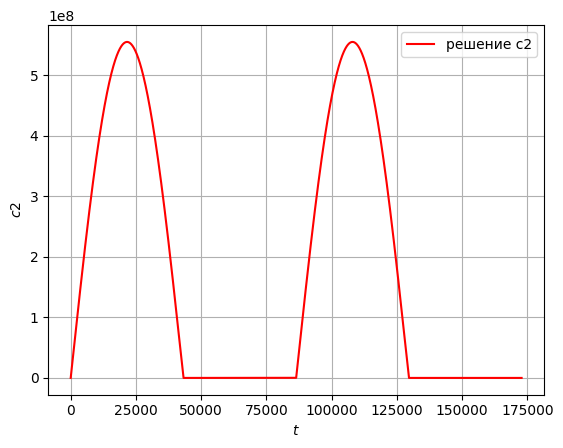

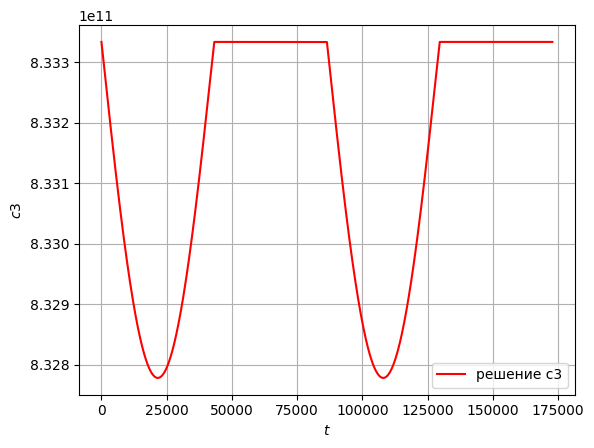

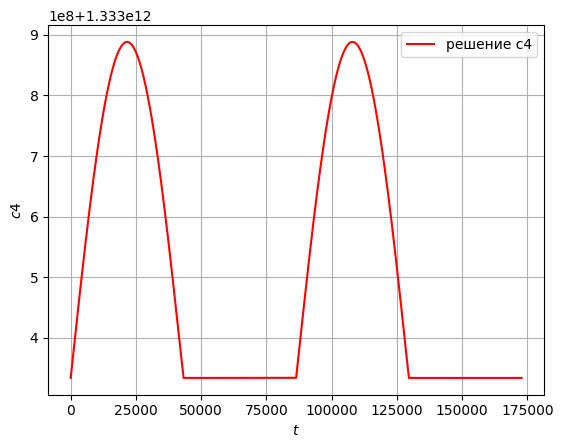

In [6]:
import math as ma
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

class Arr:
    value = []

    def __init__(self, x):
        self.value = x
    
    def __mul__(self, a):
        res = []
        for i in self.value:
            res.append(i * a)
        return Arr(res)

    def __truediv__(self, a):
        return self * (1/a)

    def __add__(self, y):
        res = []
        for i in range(len(self.value)):
            res.append(self.value[i] + y.value[i])
        return Arr(res)

    def __sub__(self, y):
        return self + y * (-1)

    def rang(self):
        res = 0
        for i in self.value:
            res = res + i * i
        return ma.sqrt(res)

class Funtion:
    y0 = 0
    y1 = 0
    step = 0
    fun = 0
    T = 0

    def __init__(self, dt, y, f, t):
        self.y0 = y[0]
        self.y1 = y[1]
        self.step = dt
        self.fun = f
        self.T = t

    def f(self, x):
        res = Arr([0, 0])
        x_ = Arr(x)
        res = x_ * 3 / 2 - self.fun(x_, self.T) * self.step - self.y1 * 2 - self.y0 / 2
        return res.value

def f(x, t):
    td = 24 * 60 * 60
    k_1 = pow(10, -2) * max(0, ma.sin(2*ma.pi*t/td))
    k_2 = pow(10, 5)
    k_3 = pow(10, -16)
    return Arr([k_1 * x.value[2] - k_2 * x.value[0],
                k_1 * x.value[2] - k_3 * x.value[1] * x.value[3],
                k_3 * x.value[1] * x.value[3] - k_1 * x.value[2],
                k_2 * x.value[0] - k_3 * x.value[1] * x.value[3]])

def next_y(i, y, dt):
    if(i == 0):
        return y[i] + f(y[i], i*dt) * dt / 2 + f(y[i] + f(y[i], i*dt) * dt, (i + 1)*dt) * dt / 2
    else:
        fun = Funtion(dt, y, f, (i + 1)*dt)
        return Arr(optimize.root(fun.f,y[i].value).x)

def solve(zero, dt, stop):
    result = [zero]
    i = 0
    while(dt * (i + 1) < stop):
        result.append(next_y(i, result, dt))
        i = i + 1
    return result

zero = Arr([0, 0, 5 * pow(10, 11), 8 * pow(10, 11)])   # краевые условия
T = 24 * 60 * 60
dt = 0.1               # шаг
result = solve(zero, dt, 2*T)
c1 = []
c2 = []
c3 = []
c4 = []
t = []
i = 0
for j in result[3:len(result)]:
    c1.append(j.value[0])
    c2.append(j.value[1])
    c3.append(j.value[2])
    c4.append(j.value[3])
    t.append(i * dt)
    i = i + 1
plt.plot(t, c1, "r", label = "решение c1")
plt.legend()
plt.grid()
plt.xlabel('$t$')
plt.ylabel('$с1$')
plt.show()

plt.plot(t, c2, "r", label = "решение c2")
plt.legend()
plt.grid()
plt.xlabel('$t$')
plt.ylabel('$с2$')
plt.show()

plt.plot(t, c3, "r", label = "решение c3")
plt.legend()
plt.grid()
plt.xlabel('$t$')
plt.ylabel('$с3$')
plt.show()

plt.plot(t, c4, "r", label = "решение c4")
plt.legend()
plt.grid()
plt.xlabel('$t$')
plt.ylabel('$с4$')
plt.show()